<a href="https://colab.research.google.com/github/timkabot/NeuralNetworkMusicGenerator/blob/master/Experiments_CGAN_anylength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from functools import partial
from gensim.models import Word2Vec
from tqdm import tqdm, tqdm_notebook
from numpy.random import randn, random, choice
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%run -i "/content/drive/My Drive/Colab Notebooks/2nd Semester Thesis/Utils.ipynb"
%run -i "/content/drive/My Drive/Colab Notebooks/2nd Semester Thesis/GANS.ipynb"

Tensorflow version is 2.2.0-rc1


NameError: ignored

In [ ]:
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

In [ ]:
syllModel = Word2Vec.load('/content/drive/My Drive/Thesis/syllEncoding_skipgram_2019_05_22_10_dim.bin')
wordModel = Word2Vec.load('/content/drive/My Drive/Thesis/wordLevelEncoder_skipgram_2019_05_22_10_dim.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
X = np.load("/content/drive/My Drive/Thesis/X.npy")
lyrics_embeddings = np.load("/content/drive/My Drive/Thesis/lyrics_embeddings.npy")

Data preprocessing 


1) normalize data 


2) divide it to chunks with fixed size



In [ ]:
song_size = 20
all_triples, all_embeddings, songs_count = get_all_cutted_triples_with_lyricsEmbeddings_and_song_count(X, lyrics_embeddings, song_size)

normalized_triples, triples_scaler = get_normalized_triples_with_scaler(all_triples)
all_normalized_embeddings, embeddings_scaler = get_normalized_embeddings_with_scaler(all_embeddings)

normalized_songs = get_restored_normalized_songs_from_triples(normalized_triples, song_size, songs_count)
grouped_normalized_embeddings = get_restored_embeddings(all_normalized_embeddings, song_size, songs_count)

In [ ]:
print("Number of songs is", len(normalized_songs))

Number of songs is 99606


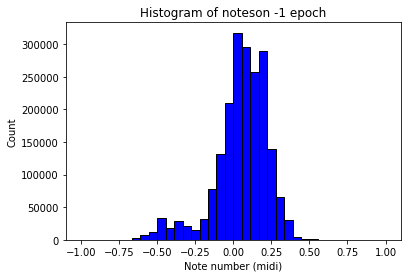

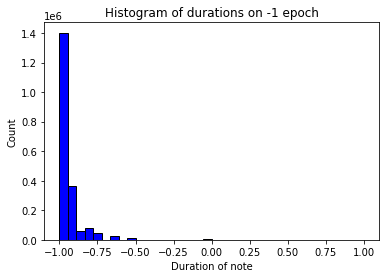

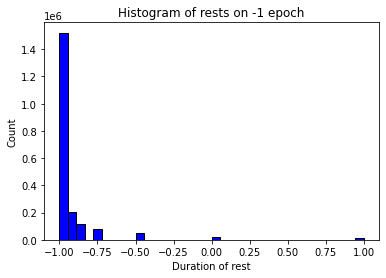

In [ ]:
show_histogram_of_notes(normalized_triples, -1)
show_duration_of_notes(normalized_triples, -1)
show_duration_of_rest(normalized_triples, -1)

In [ ]:
cgan = CGAN_anylength(all_normalized_embeddings, grouped_normalized_embeddings, 3000, 500)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 400)         678400    
_________________________________________________________________
dropout (Dropout)            (None, None, 400)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 400)               1281600   
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 401       
Total params: 1,960,401
Trainable params: 1,960,401
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)            

In [ ]:
cgan.generator.load_weights("/content/drive/My Drive/Thesis/SecondSemester/CGAN_anylength/generator_epoch_24000.h5")
cgan.combined.load_weights("/content/drive/My Drive/Thesis/SecondSemester/CGAN_anylength/combined_epoch_24000.h5")
cgan.discriminator.load_weights("/content/drive/My Drive/Thesis/SecondSemester/CGAN_anylength/discriminator_epoch_24000.h5")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


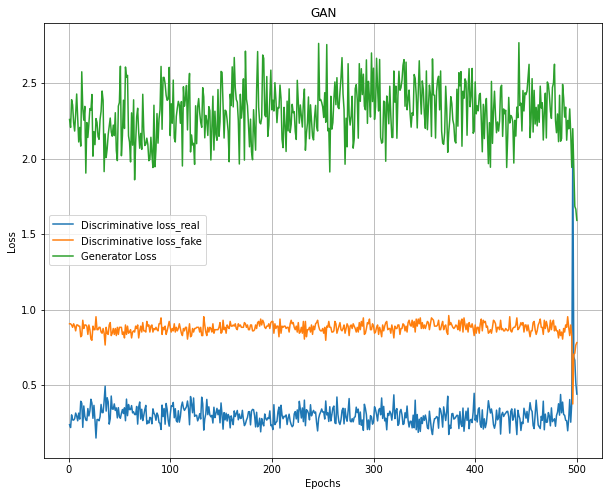

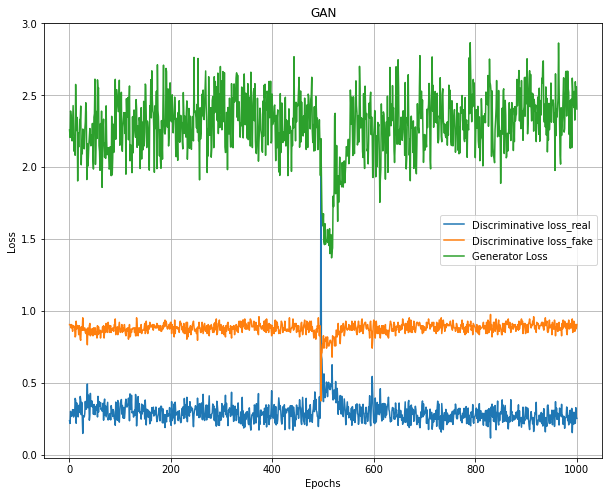

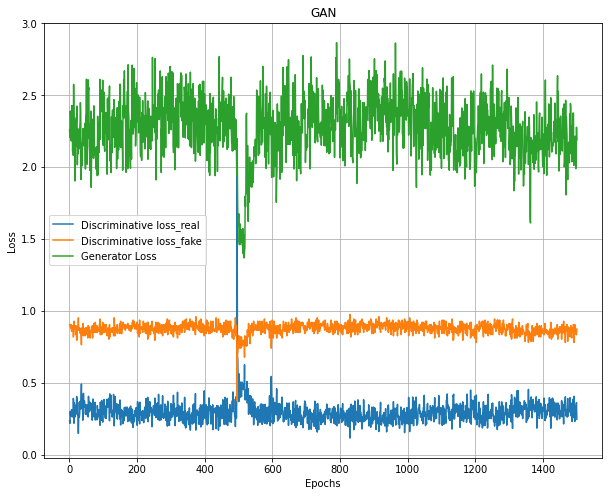

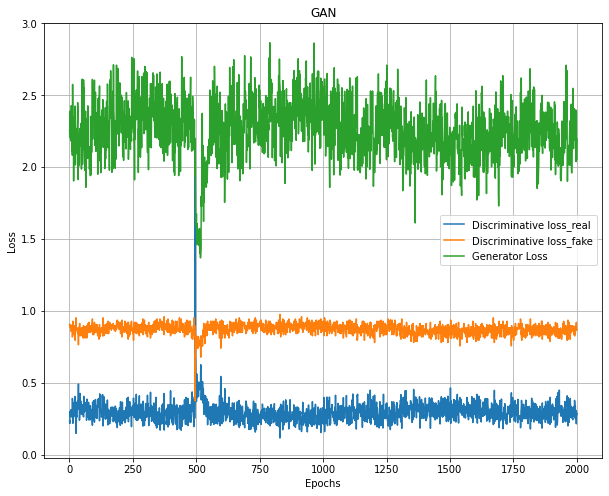

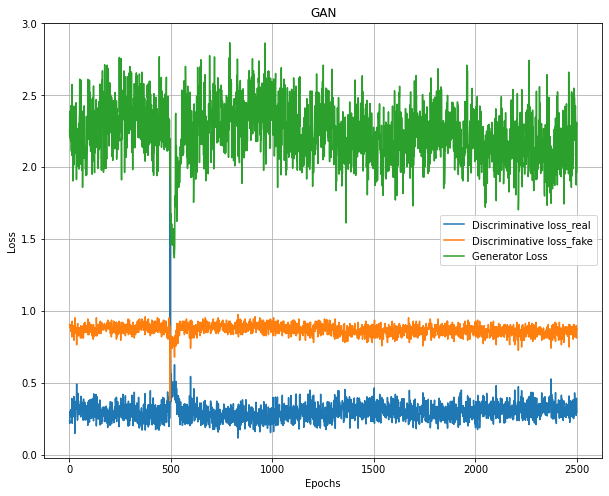

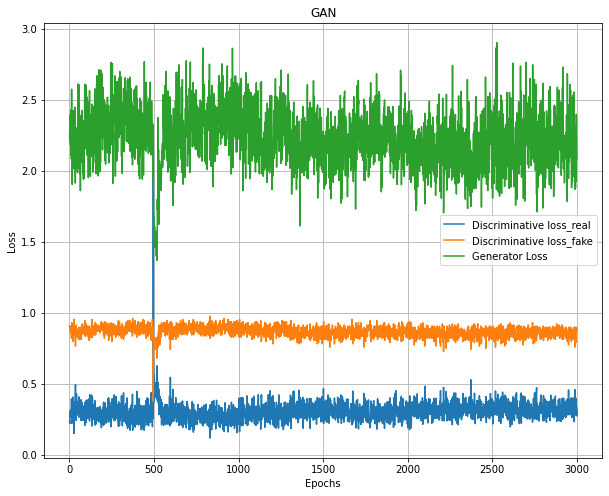

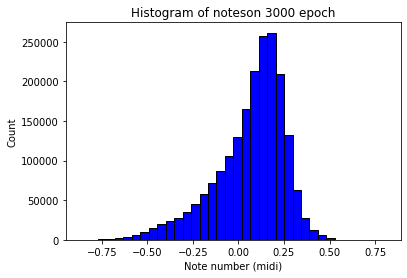

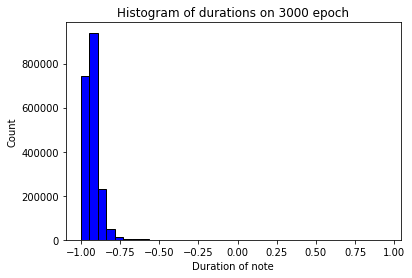

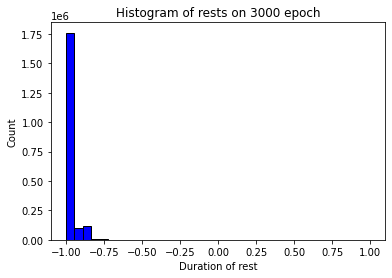

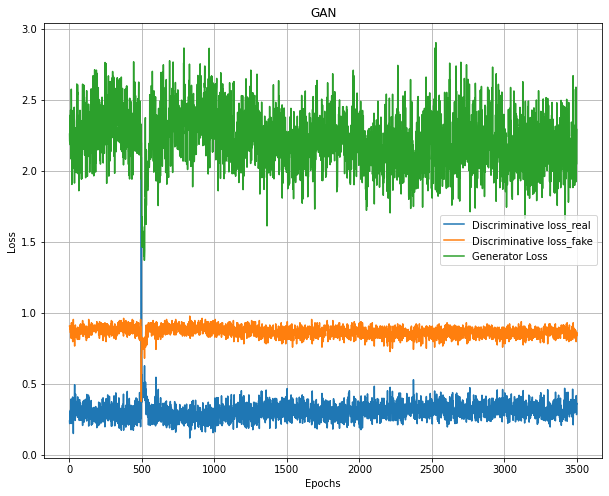

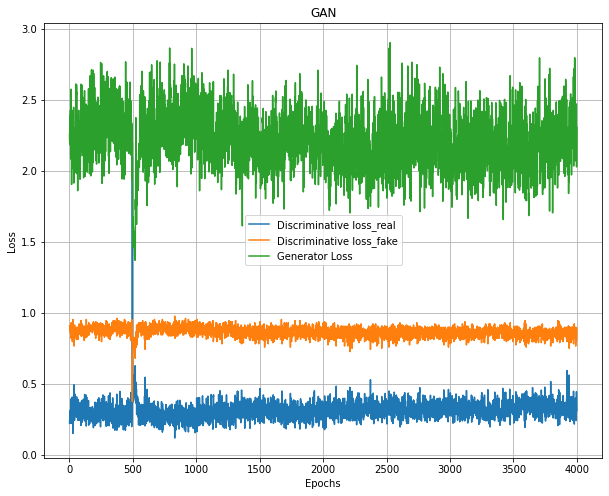

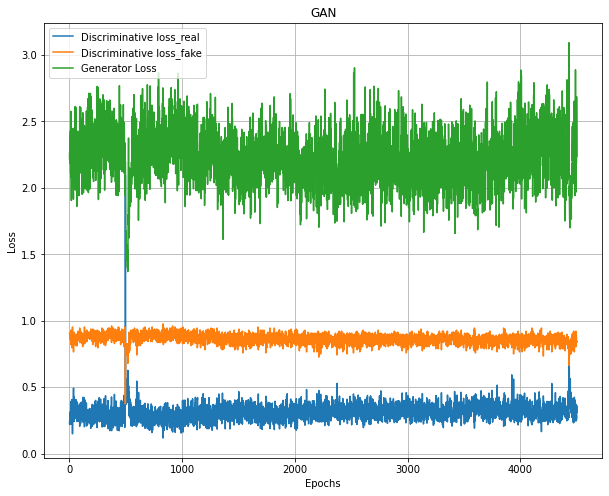

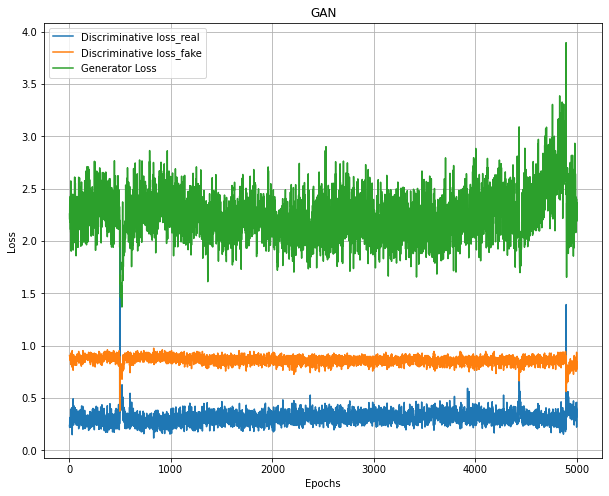

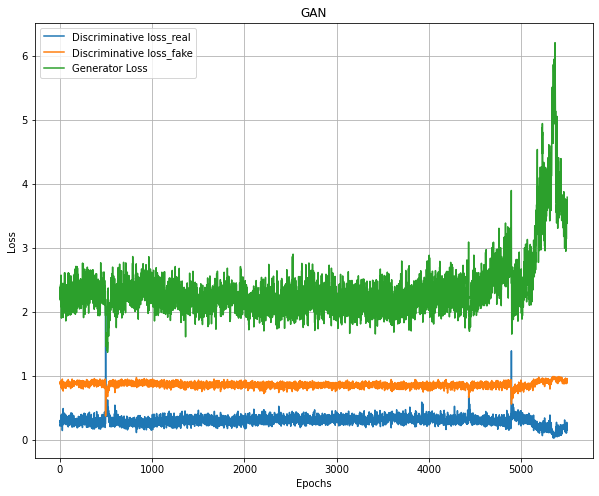

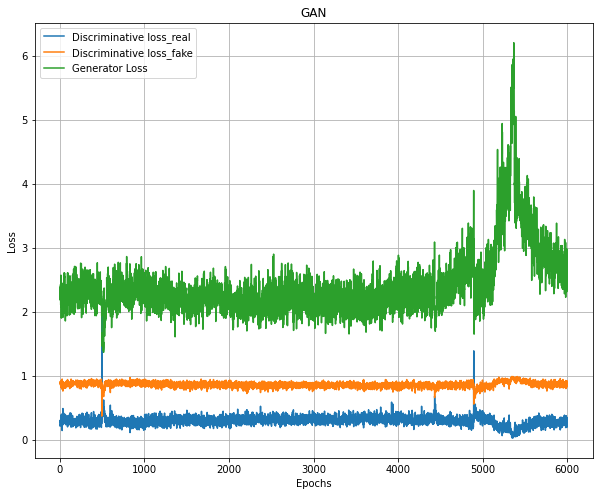

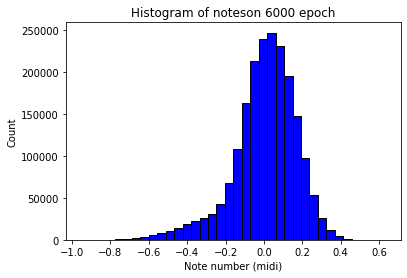

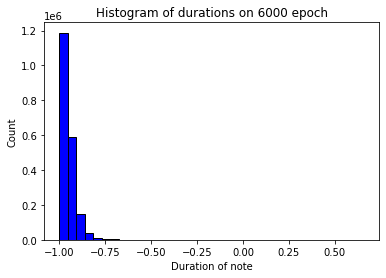

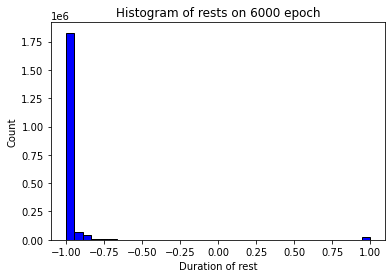

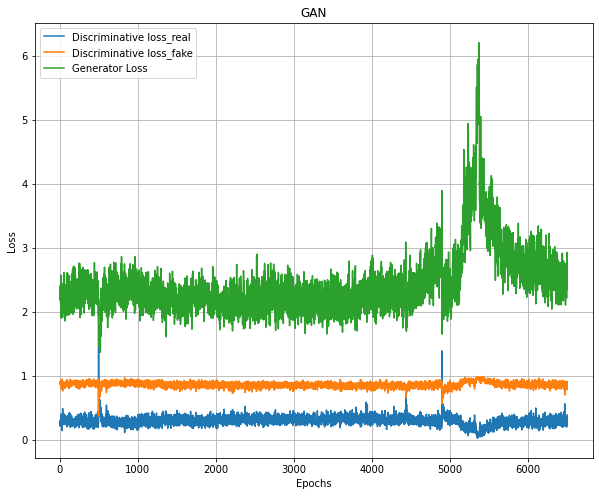

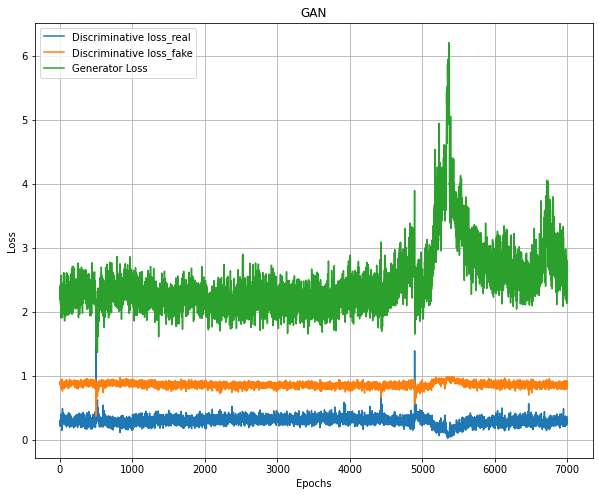

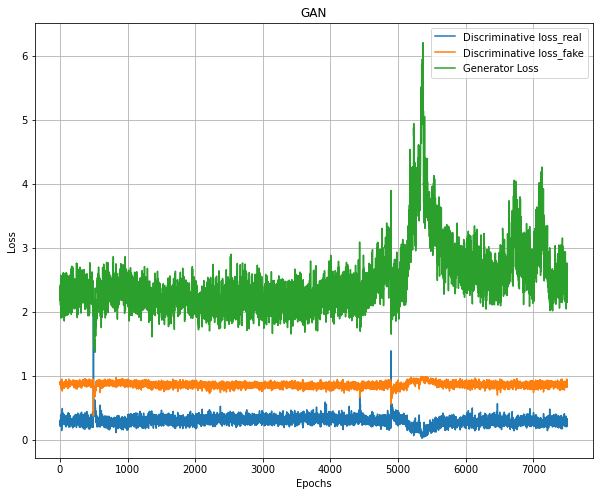

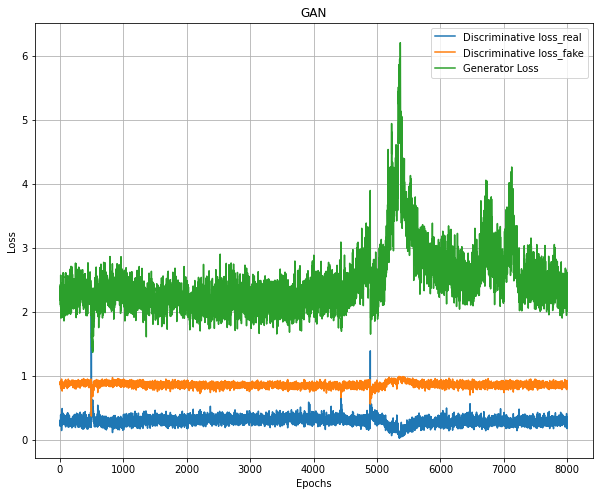

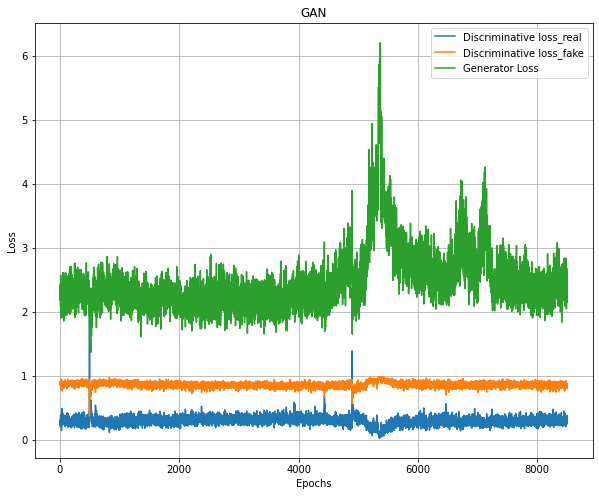

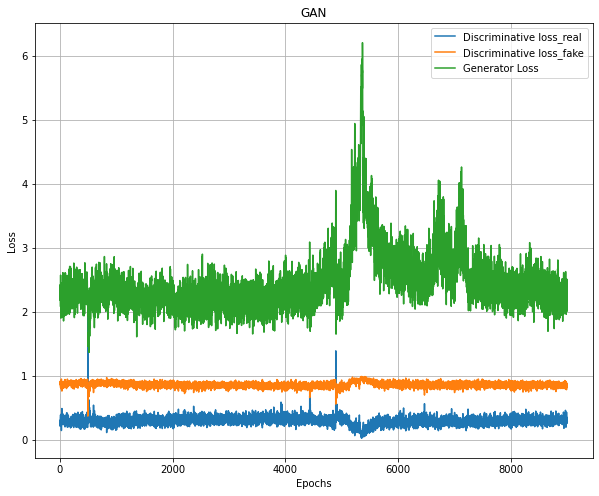

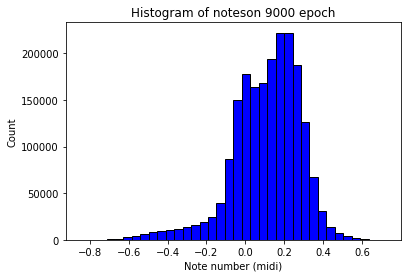

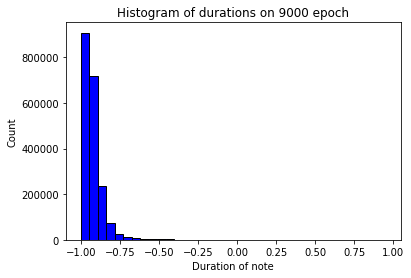

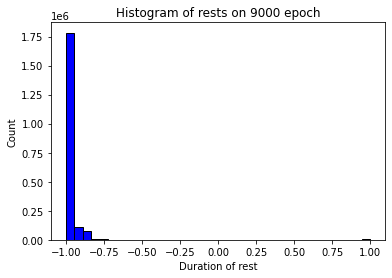

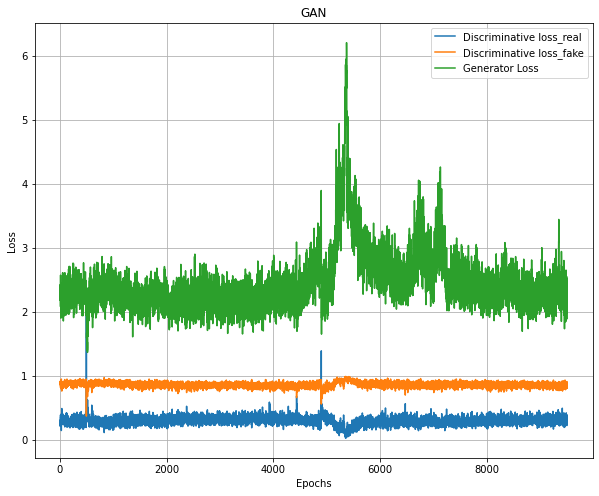

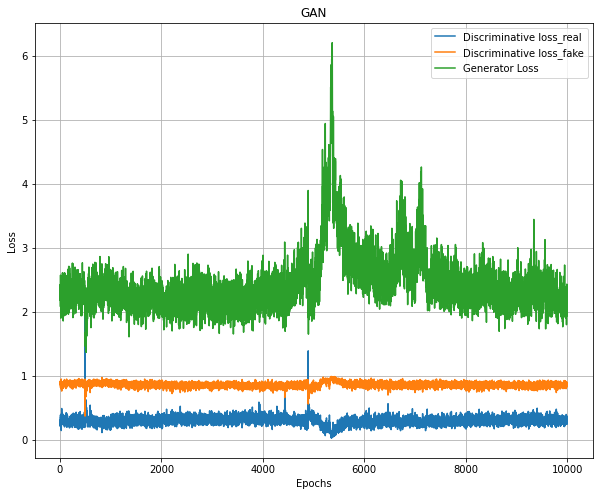

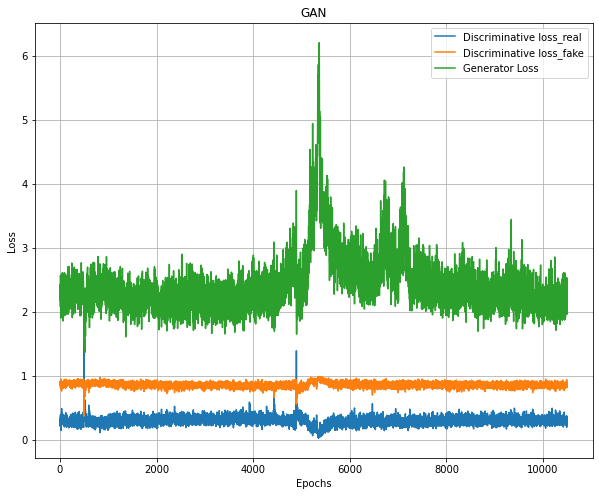

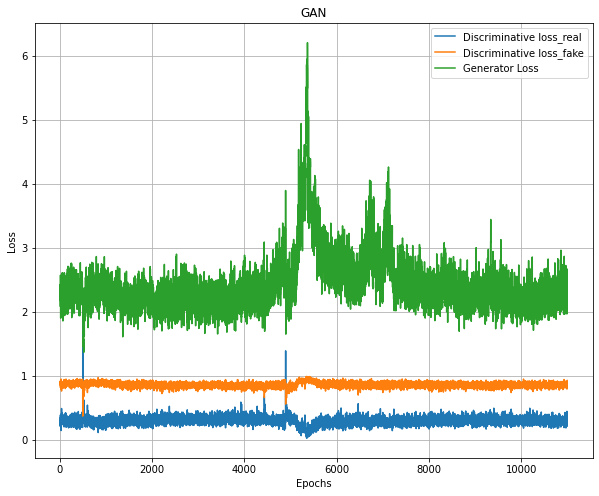

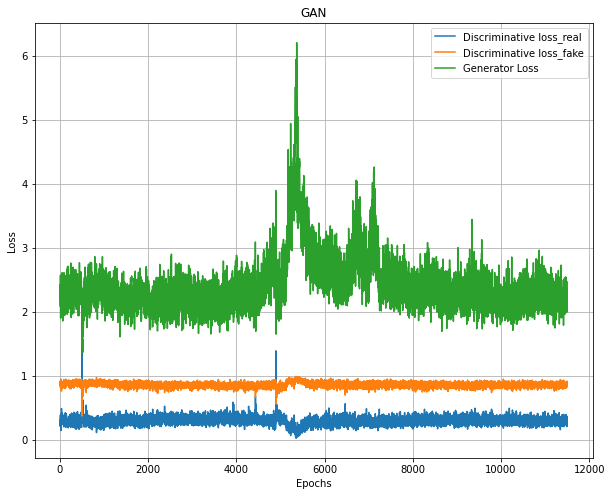

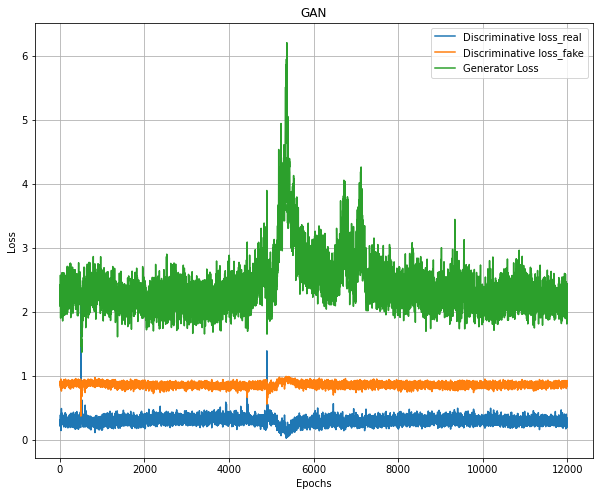

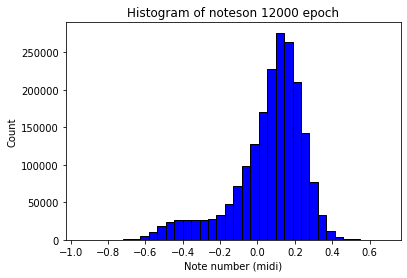

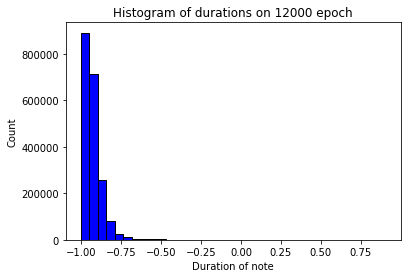

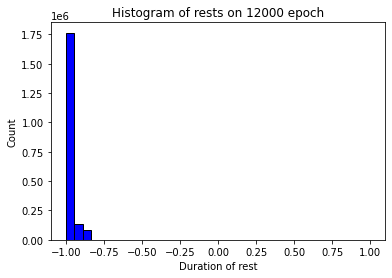

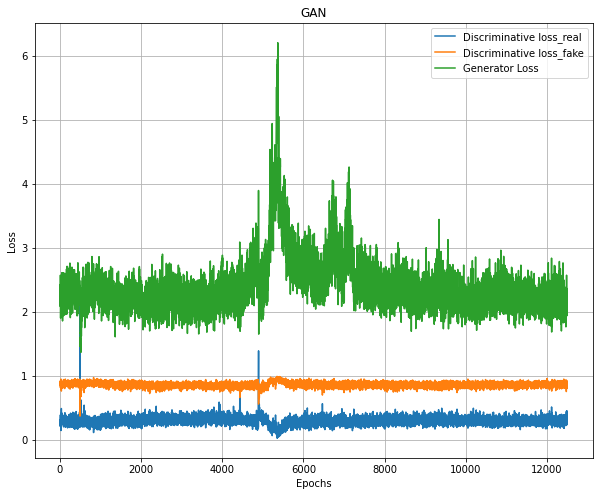

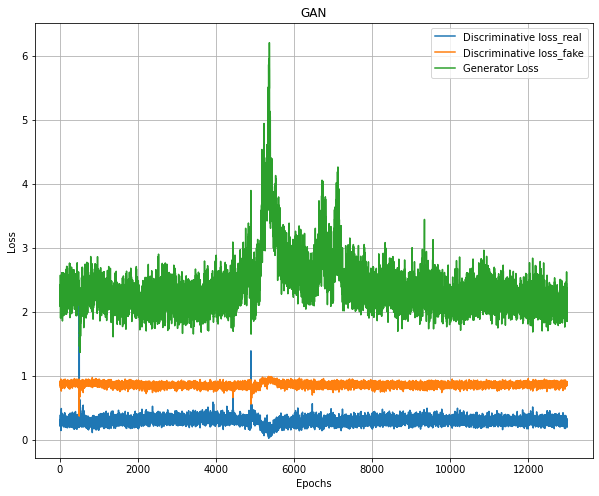

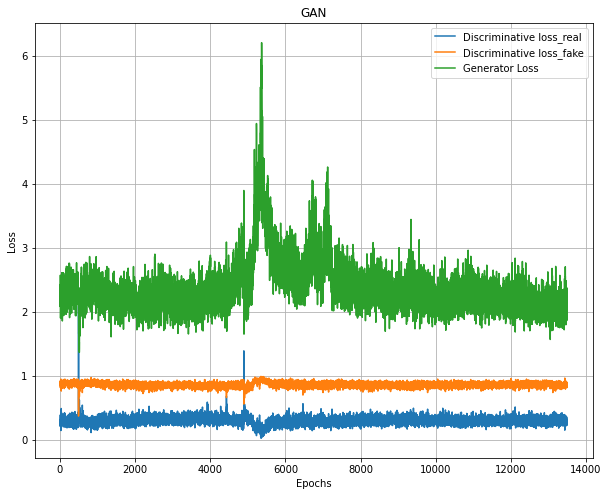

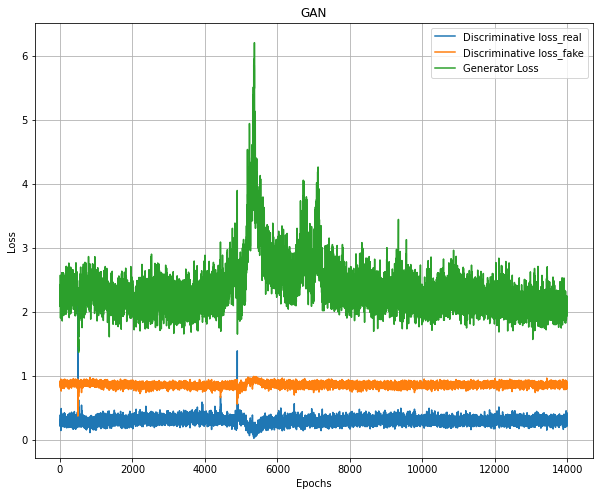

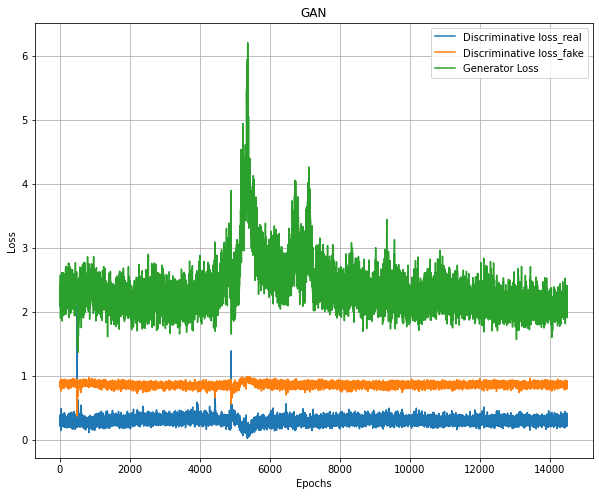

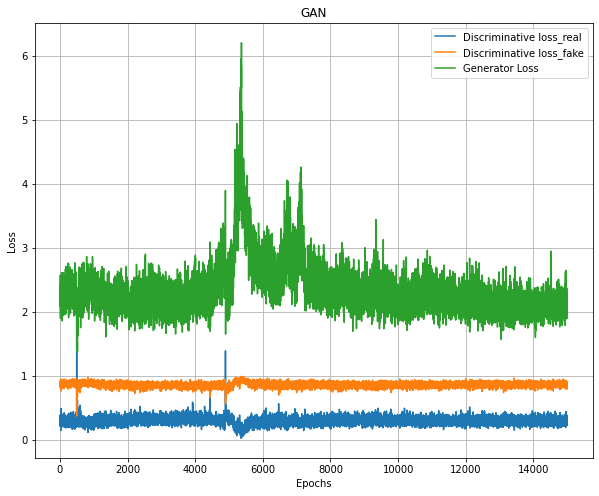

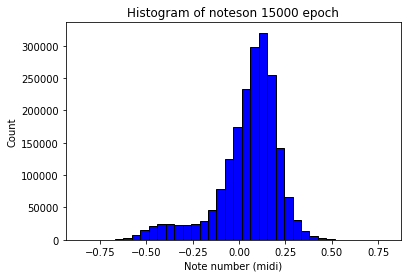

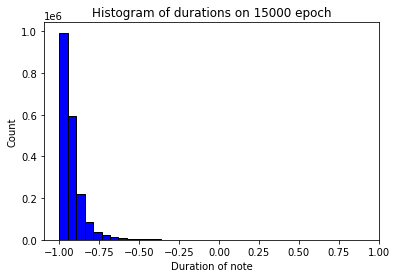

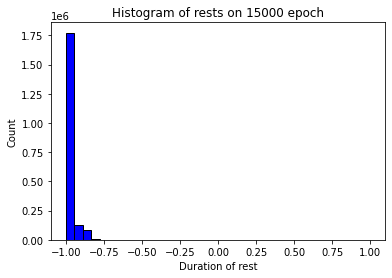

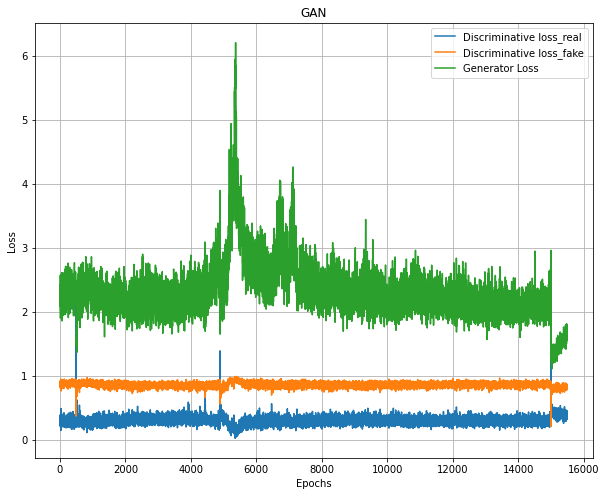

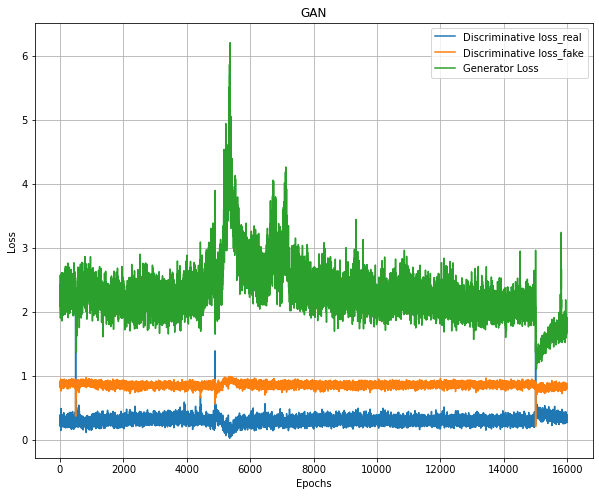

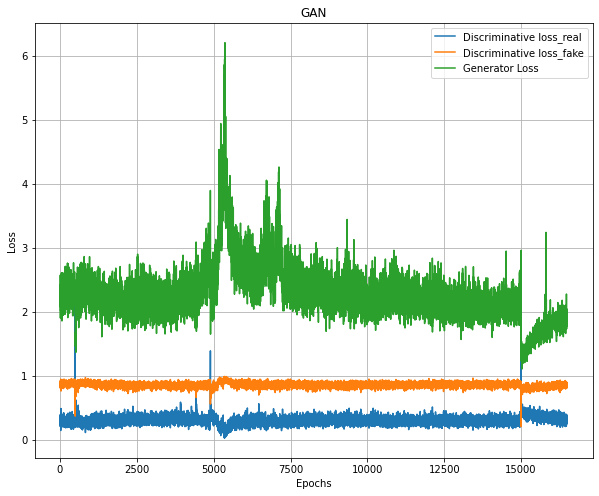

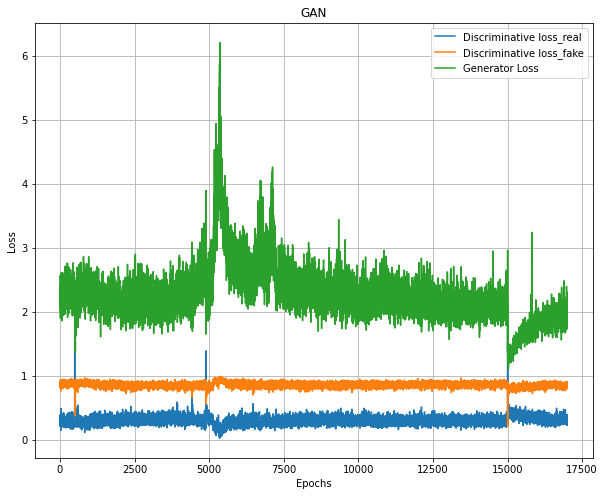

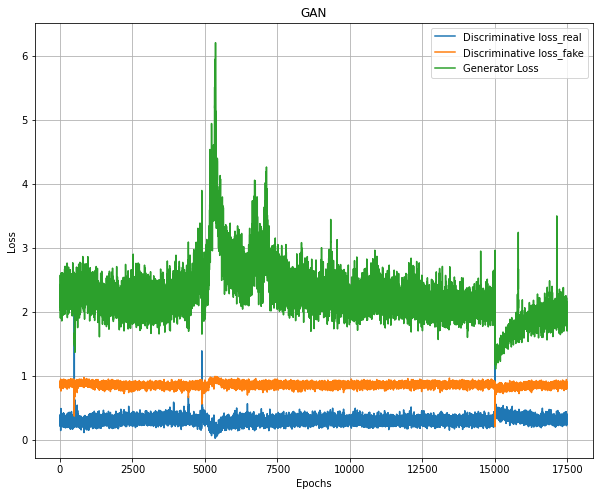

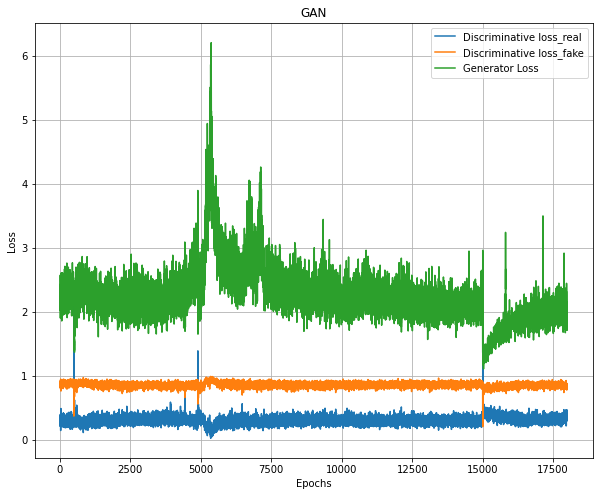

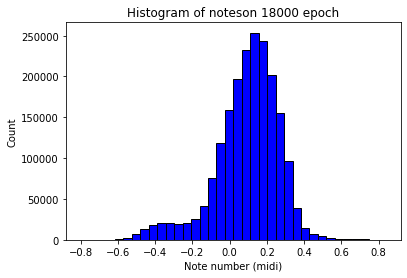

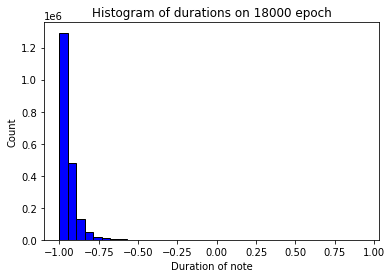

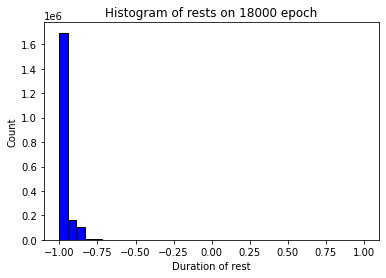

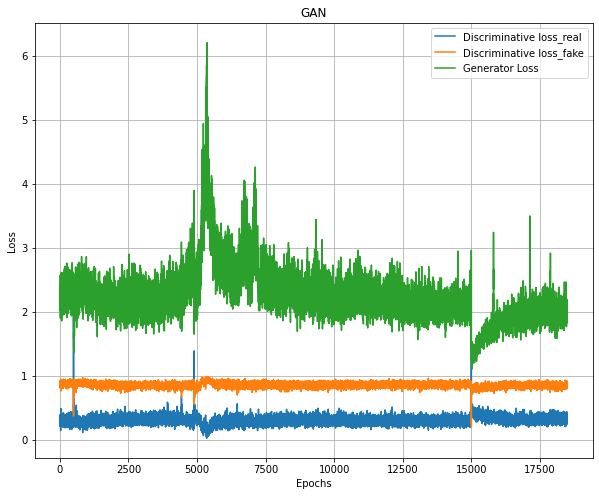

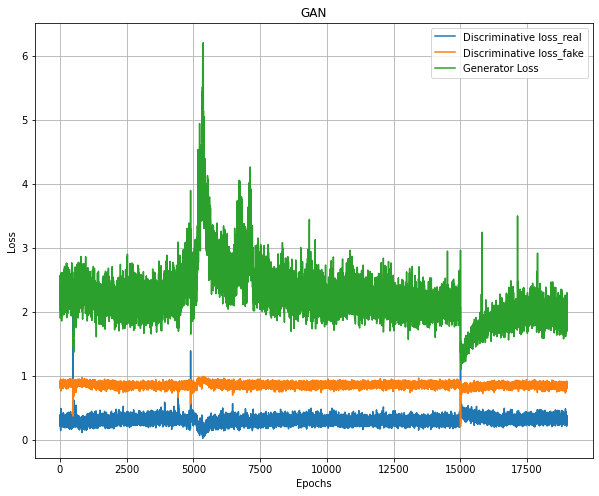

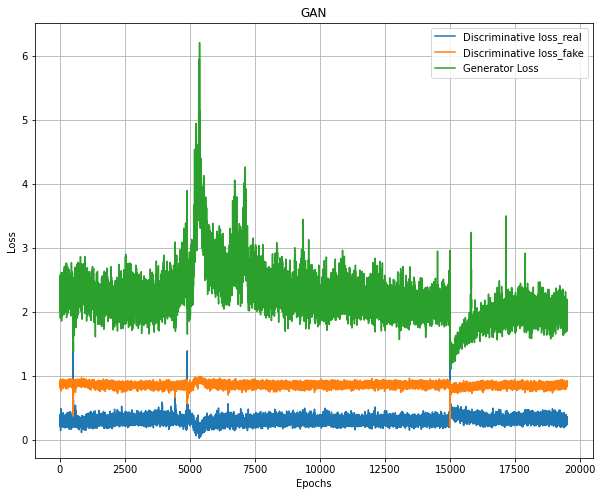

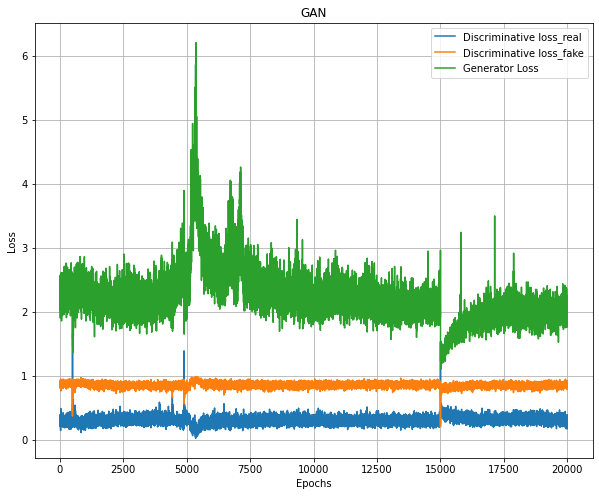

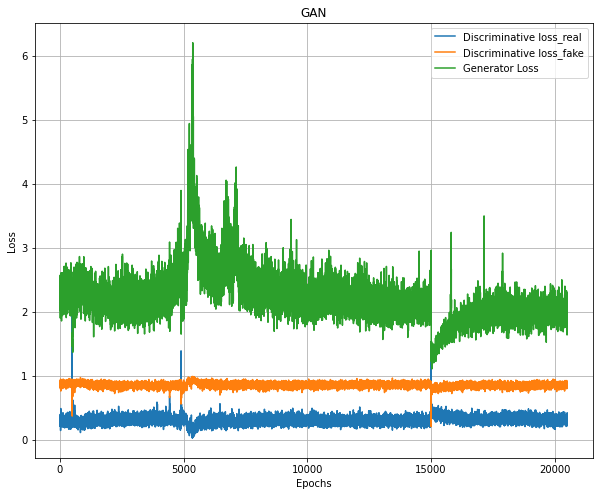

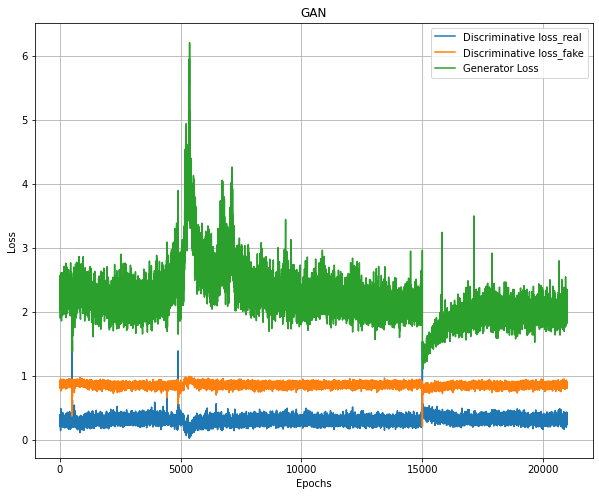

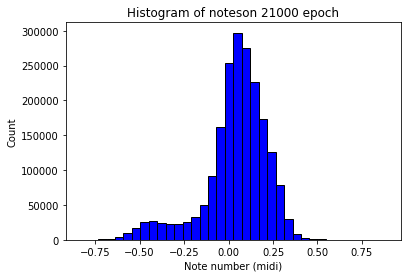

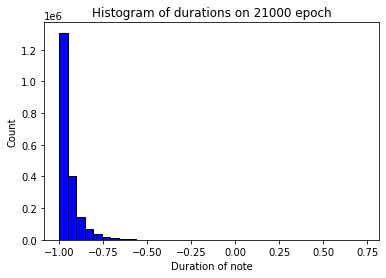

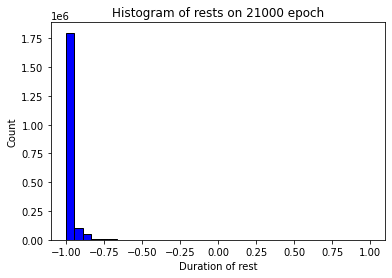

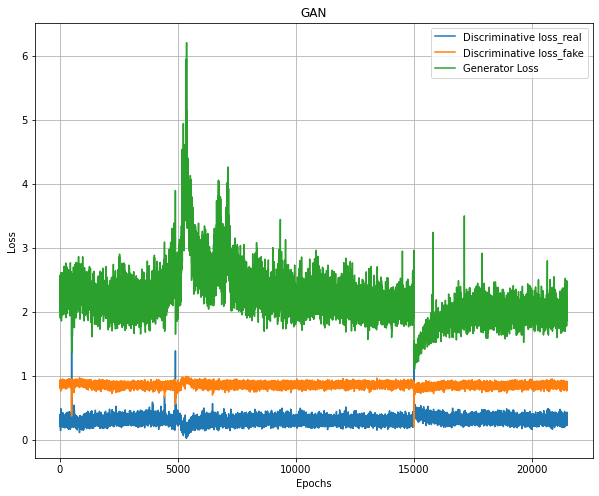

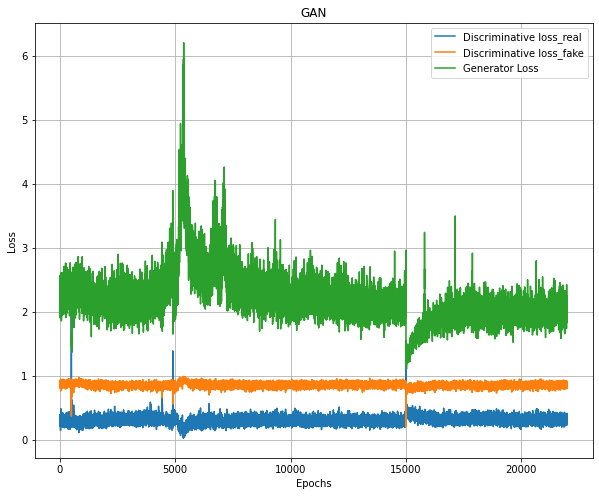

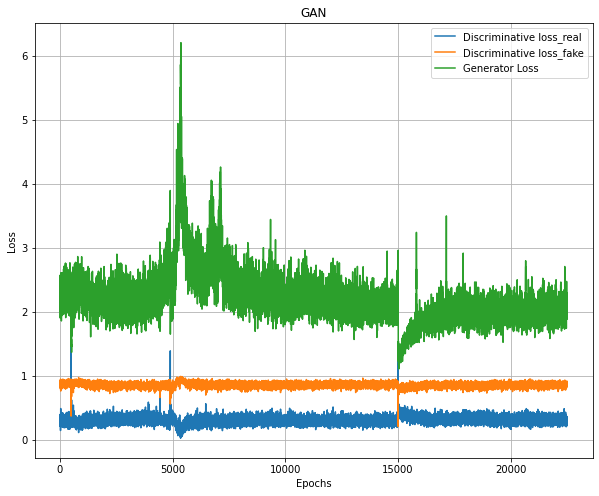

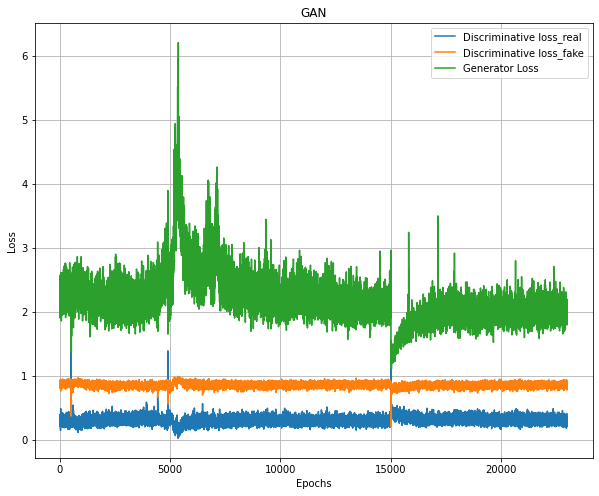

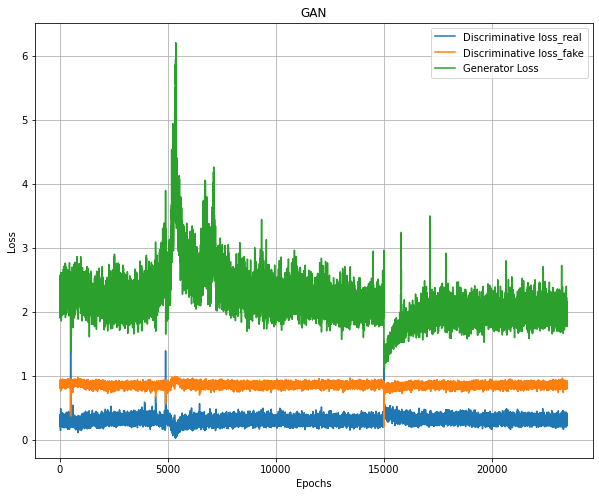

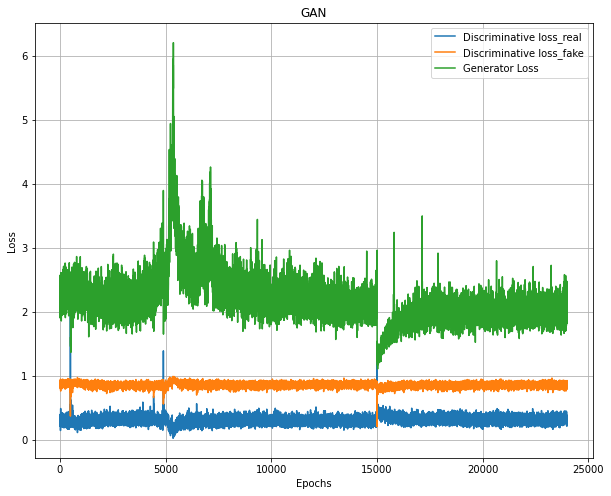

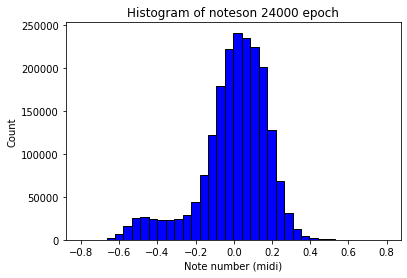

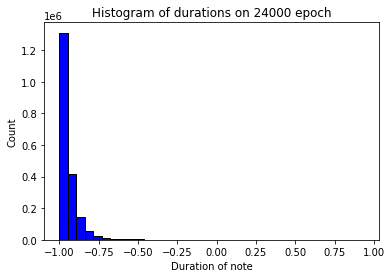

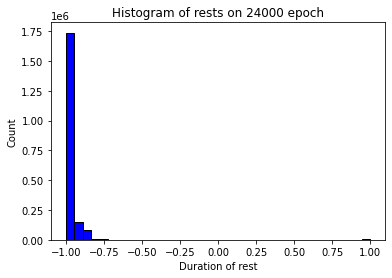

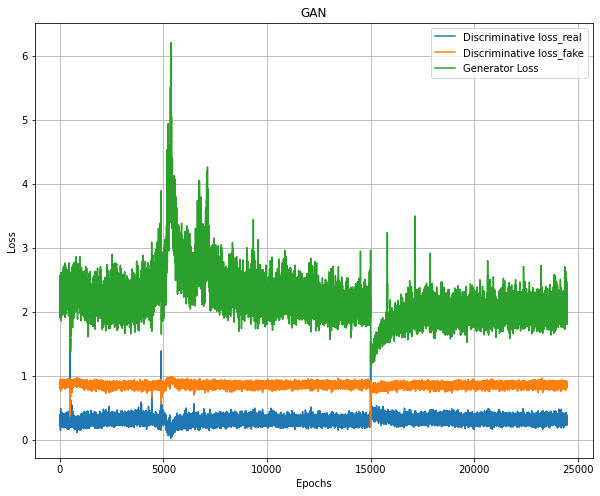

In [ ]:
cgan.train(epochs = 25000, X_train = normalized_songs, y_train = grouped_normalized_embeddings, song_size = song_size, batch_size = 64)